https://yt-project.org/doc/cookbook/complex_plots.html#multi-width-image

https://yt-project.org/doc/quickstart/volume_rendering.html

In [1]:
import yt
import h5py
import numpy as np

In [3]:
import os 
os.chdir('/home/tpawp/Desktop/Mycop') 
os.getcwd()

'/home/tpawp/Desktop/Mycop'

In [50]:
#f = h5py.File("densdataz_256", mode="r")
f = h5py.File("galmerge2", mode="r")

In [ ]:
print(f["3d_qube_64"][()])

In [51]:
Psi = f["3d_qube_10"][()]

In [53]:
arr = np.abs(Psi)#np.random.random(size=(64,64,64))

In [54]:
data = dict(density = (arr, "g/cm**3"))
bbox = np.array([[-8, 8], [-8, 8], [-8, 8]])
ds = yt.load_uniform_grid(data, arr.shape, length_unit="Mpc", bbox=bbox, nprocs=4)

yt : [INFO     ] 2022-09-07 09:55:03,199 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-07 09:55:03,200 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-07 09:55:03,200 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-07 09:55:03,201 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-07 09:55:03,201 Parameters: cosmological_simulation   = 0


In [55]:
np.min( np.abs(arr[10]) ), np.max( np.abs(arr[10]) )

(0.6828463939871112, 1.2985859143566942)

In [56]:
np.min( np.log(np.abs(arr[10])) ), np.max( np.log(np.abs(arr[10])) )

(-0.3814853436988988, 0.2612759142420273)

In [10]:
from yt.visualization.volume_rendering.api import Scene, create_volume_source

yt : [INFO     ] 2022-09-06 14:49:07,748 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-06 14:49:07,749 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-06 14:49:07,750 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-06 14:49:07,750 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-06 14:49:07,751 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-06 14:49:07,885 Creating transfer function
yt : [INFO     ] 2022-09-06 14:49:07,885 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2022-09-06 14:49:08,309 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-06 14:49:08,310 Creating volume
yt : [INFO     ] 2022-09-06 14:49:09,086 Creating transfer function
yt : [INFO     ] 2022-09-06 14:49:09,087 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid th

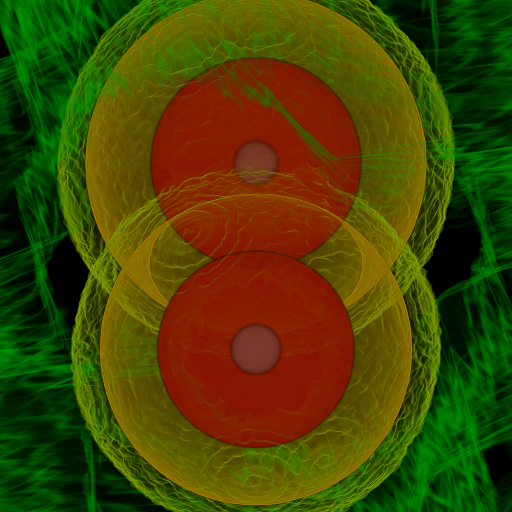

In [13]:
field = ("gas", "density")

# normal_vector points from camera to the center of tbe final projection.
# Now we look at the positive x direction.
normal_vector = [1.0, 0.0, 0.0]
# north_vector defines the "top" direction of the projection, which is
# positive z direction here.
north_vector = [0.0, 0.0, 1.0]




# Follow the simple_volume_rendering cookbook for the first part of this.
#for i in range( 111, f["Num_steps"][()] ):
i = 0
arr = f["3d_qube_%d"%(i+1)][()]
arr = np.abs(arr)
arr /= np.max(arr)
data = dict(density = (np.abs(arr), "g/cm**3"))
ds = yt.load_uniform_grid(data, arr.shape, length_unit="Mpc", bbox=bbox, nprocs=4)

sc = yt.create_scene(ds, field=("gas", "density"))
vol = create_volume_source(ds, field=field)
tf = vol.transfer_function
tf.grey_opacity = True

# Plane-parallel lens
cam = sc.add_camera(ds, lens_type="plane-parallel")
# Set the resolution of tbe final projection.
cam.resolution = [512, 512]
# Set the location of the camera to be (x=0.2, y=0.5, z=0.5)
# For plane-parallel lens, the location info along the normal_vector (here
# is x=0.2) is ignored.
cam.position = ds.arr(np.array([0.2, 0.5, 0.5]), "code_length")
# Set the orientation of the camera.
cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
# Set the width of the camera, where width[0] and width[1] specify the length and
# height of final projection, while width[2] in plane-parallel lens is not used.
cam.set_width(ds.domain_width * 0.5)
sc.add_source(vol)
#sc.save("lens_plane-parallel.png", sigma_clip=6.0)
sc.show(sigma_clip=4) 
#sc.save("ncols_%d.png"%i, sigma_clip=4)

yt : [INFO     ] 2022-09-08 14:30:56,165 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:30:56,165 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:30:56,165 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:30:56,166 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:30:56,166 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:30:56,302 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:30:56,303 Creating volume
yt : [INFO     ] 2022-09-08 14:30:57,047 Creating transfer function
yt : [INFO     ] 2022-09-08 14:30:57,048 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


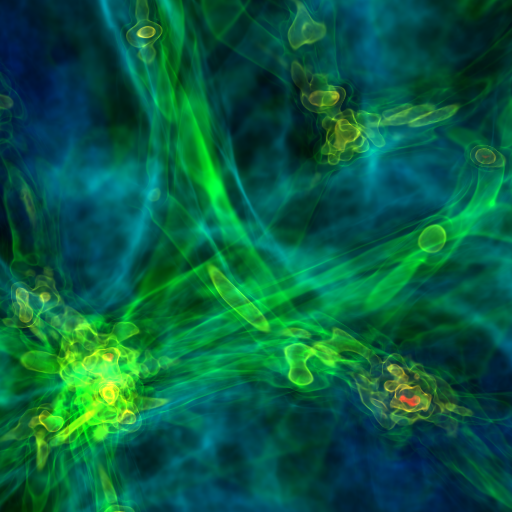

In [73]:
i = 80
arr = f["3d_qube_%d"%(i+1)][()]
arr = np.abs(arr)
arr /= np.max(arr)
arr = np.array( [ [ [ x if x>1e-3 else 0.0 for x in y] for y in z] for z in arr ] )
data = dict(density = (arr, "g/cm**3"))
ds = yt.load_uniform_grid(data, arr.shape, length_unit="Mpc", bbox=bbox, nprocs=4)

# Create a volume rendering
sc = yt.create_scene(ds, field=("gas", "density"))

# Now increase the resolution
sc.camera.resolution = (512, 512)

# Set the camera focus to a position that is offset from the center of
# the domain
sc.camera.focus = ds.arr([0.3, 0.3, 0.3], "unitary")

# Move the camera position to the other side of the dataset
sc.camera.position = ds.arr([0, 0, 0], "unitary")
sc.camera.zoom(4.0)
# save to disk with a custom filename and apply sigma clipping to eliminate
# very bright pixels, producing an image with better contrast.
sc.render()
sc.show(sigma_clip=4) 

In [74]:
for i in range( f["Num_steps"][()] ):
#for i in range( 10, 14 ):
    arr = f["3d_qube_%d"%(i+1)][()]
    arr = np.abs(arr)
    arr /= np.max(arr)
    arr = np.array( [ [ [ x if x>1e-3 else 0.0 for x in y] for y in z] for z in arr ] )
    data = dict(density = (arr, "g/cm**3"))
    ds = yt.load_uniform_grid(data, arr.shape, length_unit="Mpc", bbox=bbox, nprocs=4)

    sc = yt.create_scene(ds, field=("gas", "density"))
    sc.camera.resolution = (512, 512)
    sc.camera.focus = ds.arr([0.3, 0.3, 0.3], "unitary")
    sc.camera.position = ds.arr([0, 0, 0], "unitary")
    sc.camera.zoom(4.0)
    sc.render()
    sc.save("cweb_%d.png"%i, sigma_clip=4)

yt : [INFO     ] 2022-09-08 14:31:14,258 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:31:14,258 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:31:14,259 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:31:14,259 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:31:14,260 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:31:14,397 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:31:14,398 Creating volume
yt : [INFO     ] 2022-09-08 14:31:15,126 Creating transfer function
yt : [INFO     ] 2022-09-08 14:31:15,126 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:31:20,748 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:31:20,749 Re

yt : [INFO     ] 2022-09-08 14:33:19,954 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:33:19,955 Creating volume
yt : [INFO     ] 2022-09-08 14:33:20,666 Creating transfer function
yt : [INFO     ] 2022-09-08 14:33:20,666 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:33:26,524 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:33:26,525 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:33:32,327 Saving rendered image to cweb_7.png
yt : [INFO     ] 2022-09-08 14:33:37,629 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:33:37,630 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:33:37,630 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:33:37,631 Parameters: domain_righ

yt : [INFO     ] 2022-09-08 14:35:31,984 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:35:37,962 Saving rendered image to cweb_14.png
yt : [INFO     ] 2022-09-08 14:35:43,588 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:35:43,588 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:35:43,589 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:35:43,589 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:35:43,590 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:35:43,718 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:35:43,720 Creating volume
yt : [INFO     ] 2022-09-08 14:35:44,471 Creating transfer function
yt : [INFO     ] 2022-09-08 14:35:44,471 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:35:50,835 Previously

yt : [INFO     ] 2022-09-08 14:37:56,106 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:37:56,107 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:37:56,239 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:37:56,240 Creating volume
yt : [INFO     ] 2022-09-08 14:37:57,056 Creating transfer function
yt : [INFO     ] 2022-09-08 14:37:57,057 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:38:03,338 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:38:03,338 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:38:09,508 Saving rendered image to cweb_22.png
yt : [INFO     ] 2022-09-08 14:38:15,598 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:38:15,598 Parameters: domain_dimensions        

yt : [WARNING  ] 2022-09-08 14:40:13,037 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:40:13,038 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:40:18,719 Saving rendered image to cweb_29.png
yt : [INFO     ] 2022-09-08 14:40:24,146 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:40:24,146 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:40:24,147 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:40:24,147 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:40:24,148 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:40:24,277 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:40:24,279 Creating volume
yt : [INFO     ] 2022-09-08 14:40:24,982 Creating transfer function
yt : [INFO     ] 2022-09-08 14

yt : [INFO     ] 2022-09-08 14:42:40,139 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:42:40,139 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:42:40,140 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:42:40,271 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:42:40,272 Creating volume
yt : [INFO     ] 2022-09-08 14:42:41,050 Creating transfer function
yt : [INFO     ] 2022-09-08 14:42:41,051 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:42:47,580 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:42:47,580 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:42:53,945 Saving rendered image to cweb_37.png
yt : [INFO     ] 2022-09-08 14:43:00,132 Parameters: current_time   

yt : [INFO     ] 2022-09-08 14:44:52,824 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:44:58,719 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:44:58,720 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:45:04,699 Saving rendered image to cweb_44.png
yt : [INFO     ] 2022-09-08 14:45:10,202 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:45:10,203 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:45:10,203 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:45:10,204 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:45:10,204 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:45:10,341 Rendering scene (Can take a while).
yt : [INFO   

yt : [INFO     ] 2022-09-08 14:47:23,440 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:47:23,440 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:47:23,440 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:47:23,441 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:47:23,442 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:47:23,576 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:47:23,577 Creating volume
yt : [INFO     ] 2022-09-08 14:47:24,318 Creating transfer function
yt : [INFO     ] 2022-09-08 14:47:24,319 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:47:30,411 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:47:30,412 Re

yt : [INFO     ] 2022-09-08 14:49:36,940 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:49:36,941 Creating volume
yt : [INFO     ] 2022-09-08 14:49:37,685 Creating transfer function
yt : [INFO     ] 2022-09-08 14:49:37,685 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:49:43,681 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:49:43,682 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:49:49,681 Saving rendered image to cweb_59.png
yt : [INFO     ] 2022-09-08 14:49:54,547 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:49:54,548 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:49:54,548 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:49:54,549 Parameters: domain_rig

yt : [INFO     ] 2022-09-08 14:51:46,307 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:51:52,086 Saving rendered image to cweb_66.png
yt : [INFO     ] 2022-09-08 14:51:57,536 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:51:57,536 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:51:57,537 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:51:57,538 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:51:57,538 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:51:57,667 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:51:57,668 Creating volume
yt : [INFO     ] 2022-09-08 14:51:58,406 Creating transfer function
yt : [INFO     ] 2022-09-08 14:51:58,407 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:52:04,412 Previously

yt : [INFO     ] 2022-09-08 14:54:03,090 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:54:03,090 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:54:03,223 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:54:03,224 Creating volume
yt : [INFO     ] 2022-09-08 14:54:03,968 Creating transfer function
yt : [INFO     ] 2022-09-08 14:54:03,968 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:54:09,746 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:54:09,747 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:54:15,446 Saving rendered image to cweb_74.png
yt : [INFO     ] 2022-09-08 14:54:20,984 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:54:20,984 Parameters: domain_dimensions        

yt : [WARNING  ] 2022-09-08 14:56:17,444 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:56:17,444 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:56:24,165 Saving rendered image to cweb_81.png
yt : [INFO     ] 2022-09-08 14:56:29,897 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 14:56:29,898 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 14:56:29,898 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:56:29,899 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:56:29,899 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:56:30,043 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:56:30,044 Creating volume
yt : [INFO     ] 2022-09-08 14:56:30,874 Creating transfer function
yt : [INFO     ] 2022-09-08 14

yt : [INFO     ] 2022-09-08 14:58:49,162 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 14:58:49,163 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 14:58:49,164 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 14:58:49,297 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:58:49,298 Creating volume
yt : [INFO     ] 2022-09-08 14:58:50,046 Creating transfer function
yt : [INFO     ] 2022-09-08 14:58:50,047 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 14:58:56,016 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 14:58:56,016 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 14:59:01,863 Saving rendered image to cweb_89.png
yt : [INFO     ] 2022-09-08 14:59:07,381 Parameters: current_time   

yt : [INFO     ] 2022-09-08 15:00:58,297 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [WARNING  ] 2022-09-08 15:01:04,502 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-09-08 15:01:04,502 Rendering scene (Can take a while).
yt : [INFO     ] 2022-09-08 15:01:10,566 Saving rendered image to cweb_96.png
yt : [INFO     ] 2022-09-08 15:01:16,372 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-09-08 15:01:16,372 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-09-08 15:01:16,373 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2022-09-08 15:01:16,373 Parameters: domain_right_edge         = [8. 8. 8.]
yt : [INFO     ] 2022-09-08 15:01:16,374 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-09-08 15:01:16,506 Rendering scene (Can take a while).
yt : [INFO   

In [33]:
import matplotlib.pyplot as plt

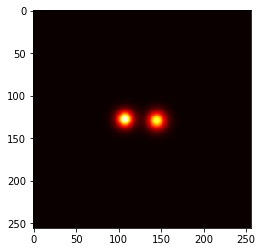

In [35]:
a = np.abs(arr)[128,:,:]
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

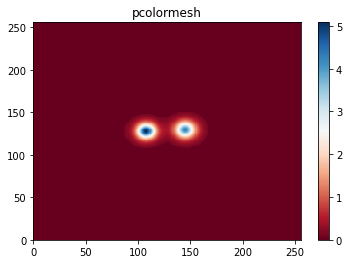

In [39]:
a = np.array([ [elem if elem>0.1 else 0.0 for elem in x_row] for x_row in a ])
z_min, z_max = -np.abs(a).max(), np.abs(a).max()

fig, ax = plt.subplots()

c = ax.pcolormesh( a, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
#ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
from matplotlib import rc_context
from matplotlib.animation import FuncAnimation

In [ ]:
ts = yt.load("GasSloshingLowRes/sloshing_low_res_hdf5_plt_cnt_*")

plot = yt.SlicePlot(ts[0], "z", ("gas", "density"))
plot.set_zlim(("gas", "density"), 8e-29, 3e-26)

fig = plot.plots[("gas", "density")].figure

# animate must accept an integer frame number. We use the frame number
# to identify which dataset in the time series we want to load
def animate(i):
    ds = ts[i]
    plot._switch_ds(ds)


animation = FuncAnimation(fig, animate, frames=len(ts))

# Override matplotlib's defaults to get a nicer looking font
with rc_context({"mathtext.fontset": "stix"}):
    animation.save("animation.mp4")

In [ ]:
# Center on the domain center
center = ds.domain_center

# First make the left and right corner of the region based
# on the full domain.
left_corner = ds.domain_left_edge
right_corner = ds.domain_right_edge

# Now adjust the size of the region along the line of sight (x axis).
depth = ds.quan(5.0, "Mpc")
left_corner[0] = center[0] - 0.5 * depth
right_corner[0] = center[0] + 0.5 * depth

# Create the region
region = ds.box(left_corner, right_corner)

# Create a density projection and supply the region we have just created.
# Only cells within the region will be included in the projection.
# Try with another data container, like a sphere or disk.
plot = yt.ProjectionPlot(
    ds, "x", ("gas", "density"), weight_field=("gas", "density"), data_source=region
)

# Save the image with the keyword.
plot.show()